<a href="https://colab.research.google.com/github/MovingJoon/Mathematics-for-deeplearning/blob/master/Chapter_8_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80(%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C)_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [136]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [137]:
#데이터 전처리
from sklearn.datasets import load_iris
iris= load_iris()
x_org, y_org = iris.data, iris.target
print('원본 데이터', x_org.shape, y_org.shape)
x_data,y_data=iris.data[:100,:2],iris.target[:100]
print('대상 데이터',x_data.shape,y_data.shape)

원본 데이터 (150, 4) (150,)
대상 데이터 (100, 2) (100,)


In [138]:
#더미 변수추가
x_data=np.insert(x_data,0,1.0,axis=1)

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=70, test_size=30, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(70, 3) (30, 3) (70,) (30,)


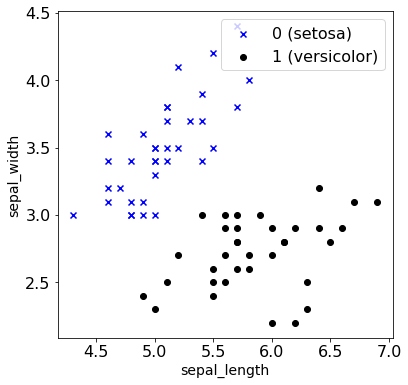

In [140]:
#산점도 표시
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)

In [141]:
#학습용 변수 설정
x=x_train
yt=y_train

In [142]:
#시그모이드 함수 
def sigmoid(x):
  return 1/(1+np.exp(-x))

#예측값 계산
def pred(x, w):
    return sigmoid(x @ w)

In [143]:
# 손실함수(교차 엔트로피 함수)
def cross_entropy(yt, yp):
    # 교차 엔트로피의 계산 (이 단계에서는 벡터)
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # 교차 엔트로피 벡터의 평균값을 계산
    return(np.mean(ce1))

#예측 결과의 확률값에서 0이나 1을 판단하는 함수
def classify(y):
  return np.where(y<0.5,0,1)

# 모델을 평가하는 함수
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    
    # 예측값 계산
    yp = pred(xt, w)
    
    # 손실함수 값 계산
    loss = cross_entropy(yt, yp)
    
    # 예측값(확률값)을 0이나 1로 변환
    yp_b = classify(yp)
    
    # 정확도 산출
    score = accuracy_score(yt, yp_b)
    return loss, score


In [156]:
# 초기화 처리

# 표본 수
M = x.shape[0]
# 입력 차원수(더미 포함)
D = x.shape[1]

# 반복 횟수
iters = 10000

# 학습률
alpha = 0.01

# 초깃값
w = np.ones(D)

# 평가 결과 기록(손실함수와 정확도)
history = np.zeros((0,3))

In [157]:
# 반복 루프

for k in range(iters):
    
    # 예측값 계산 
    yp = pred(x, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x.T @ yd) / M
    
    # 평가 결과 기록
    if ( k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, np.array([k, loss, score])))
        print( "iter = %d loss = %f score = %f" % (k, loss, score))

iter = 0 loss = 4.493842 score = 0.500000
iter = 10 loss = 3.565375 score = 0.500000
iter = 20 loss = 2.643280 score = 0.500000
iter = 30 loss = 1.762444 score = 0.500000
iter = 40 loss = 1.085375 score = 0.500000
iter = 50 loss = 0.818721 score = 0.500000
iter = 60 loss = 0.770934 score = 0.500000
iter = 70 loss = 0.761053 score = 0.333333
iter = 80 loss = 0.754468 score = 0.200000
iter = 90 loss = 0.747781 score = 0.166667
iter = 100 loss = 0.740979 score = 0.133333
iter = 110 loss = 0.734193 score = 0.166667
iter = 120 loss = 0.727485 score = 0.200000
iter = 130 loss = 0.720875 score = 0.200000
iter = 140 loss = 0.714368 score = 0.266667
iter = 150 loss = 0.707967 score = 0.300000
iter = 160 loss = 0.701670 score = 0.366667
iter = 170 loss = 0.695476 score = 0.433333
iter = 180 loss = 0.689383 score = 0.500000
iter = 190 loss = 0.683389 score = 0.566667
iter = 200 loss = 0.677493 score = 0.700000
iter = 210 loss = 0.671693 score = 0.700000
iter = 220 loss = 0.665988 score = 0.733333

In [159]:
print('[초기상태] 손실함수 : %f, 정확도: %f' %(history[0,1],history[0,2]))
print('[최종상태] 손실함수 : %f, 정확도: %f' %(history[-1,1],history[-1,2]))

[초기상태] 손실함수 : 4.493842, 정확도: 0.500000
[최종상태] 손실함수 : 0.153947, 정확도: 0.966667


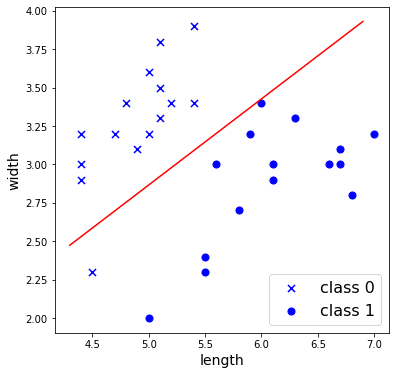

In [179]:
# 검증 데이터를 산점도용으로 준비
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]
#결정 경계
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])
# 산점도 x1의 최솟값과 최댓값
xl = np.asarray([x[:,1].min(), x[:,1].max()])
yl=b(xl,w)
#산점도 표시
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1],x_t0[:,2],marker='x',c='b',s=50,label='class 0')
plt.scatter(x_t1[:,1],x_t1[:,2],marker='o',c='b',s=50,label='class 1')
plt.plot(xl,yl,c='r')
plt.xlabel('length',fontsize=14)
plt.ylabel('width',fontsize=14)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'iter vs cost')

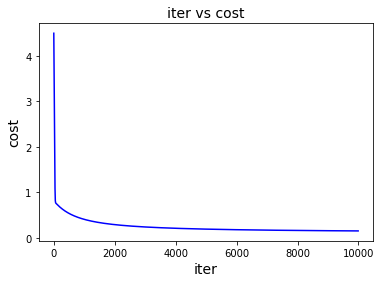

In [187]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('iter',fontsize=14)
plt.ylabel('cost',fontsize=14)
plt.title('iter vs cost', fontsize=14)

Text(0.5, 1.0, 'iter vs accuracy')

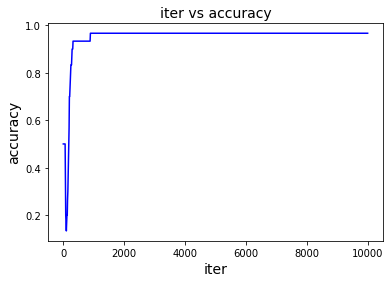

In [189]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0],history[:,2],'b')
plt.xlabel('iter',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('iter vs accuracy', fontsize=14)